In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [117]:
league = 'msu'

runs = pd.read_csv('./runs_{}_2021.csv'.format(league), low_memory=False)
hits = pd.read_csv('../events/events_2021_{}.csv'.format(league), low_memory=False)

run_hits = runs.join(hits.set_index('eventId'), how='left', on='eventId', lsuffix="asd_",  rsuffix="ddd_")

In [118]:
base = 1

run_hits_1 = run_hits[run_hits['tyyppi'] == 'nappi']
run_hits_1 = run_hits_1[run_hits_1['base'] == base]
run_hits_1 = run_hits_1[run_hits_1['vapaa'] == False]
run_hits_1 = run_hits_1[run_hits_1['merkattuLaiton'] == False]

y_1 = []
x_1 = np.arange(3.7, 5.1, 0.05)
maarat_1 = []
for tresh in x:
    under = run_hits_1[run_hits_1['aika'] < tresh]
    kerkes = len(under[under['tulos'] == 'Kärkilyönti'])
    palo = len(under[under['tulos'] == 'Palo'])
    if palo + kerkes == 0:
        y_1.append(0)
        maarat_1.append(0)
    else:
        y_1.append(kerkes / (palo + kerkes))
        maarat_1.append(palo + kerkes)
        
base = 2

run_hits_2 = run_hits[run_hits['tyyppi'] == 'nappi']
run_hits_2 = run_hits_2[run_hits_2['base'] == base]
run_hits_2 = run_hits_2[run_hits_2['vapaa'] == False]
run_hits_2 = run_hits_2[run_hits_2['merkattuLaiton'] == False]

y_2 = []
x_2 = np.arange(3.7, 5.1, 0.05)
maarat_2 = []
for tresh in x:
    under = run_hits_2[run_hits_2['aika'] < tresh]
    kerkes = len(under[under['tulos'] == 'Kärkilyönti'])
    palo = len(under[under['tulos'] == 'Palo'])
    if palo + kerkes == 0:
        y_2.append(0)
        maarat_2.append(0)
    else:
        y_2.append(kerkes / (palo + kerkes))
        maarat_2.append(palo + kerkes)

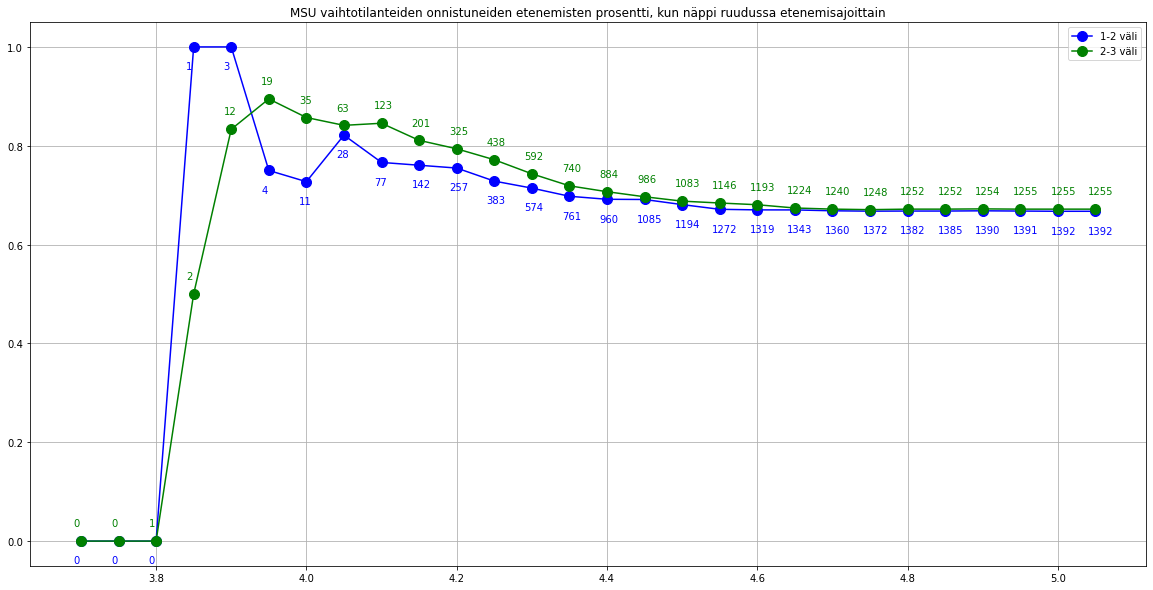

In [119]:
fig, ax = plt.subplots(figsize = (20, 10))
ax.plot(x_1, y_1, marker='o', markersize=10, label="1-2 väli", color="blue")
ax.plot(x_2, y_2, marker='o', markersize=10, label="2-3 väli", color="g")
ax.grid()

for index, (i,j) in enumerate(zip(x_1,y_1)):
    corr = -0.05 # adds a little correction to put annotation in marker's centrum
    ax.annotate(str(maarat_1[index]),  xy=(i - 0.01, j - .045), color="blue", fontsize=10) 

for index, (i,j) in enumerate(zip(x_2,y_2)):
    corr = 0.05 # adds a little correction to put annotation in marker's centrum
    ax.annotate(str(maarat_2[index]),  xy=(i - 0.01, j + .03), color="green", fontsize=10) 
    
ax.title.set_text('MSU vaihtotilanteiden onnistuneiden etenemisten prosentti, kun näppi ruudussa etenemisajoittain')
ax.legend()

fig.savefig('./1&2_{}_etenemiset_napeilla.png'.format(league))

In [64]:
base = 2

run_hits = run_hits[run_hits['tyyppi'] == 'nappi']
run_hits = run_hits[run_hits['base'] == base]
run_hits = run_hits[run_hits['vapaa'] == False]
run_hits = run_hits[run_hits['merkattuLaiton'] == False]

y = []
x = np.arange(3.7, 5.1, 0.05)
maarat = []
for tresh in x:
    under = run_hits[run_hits['aika'] < tresh]
    kerkes = len(under[under['tulos'] == 'Kärkilyönti'])
    palo = len(under[under['tulos'] == 'Palo'])
    if palo + kerkes == 0:
        y.append(0)
        maarat.append(0)
    else:
        y.append(kerkes / (palo + kerkes))
        maarat.append(palo + kerkes)
        
ax.plot(x, y, marker='o', markersize=10, label="Päivittäinen keskiarvo", color="g")
ax.grid()

for index, (i,j) in enumerate(zip(x,y)):
    corr = -0.05 # adds a little correction to put annotation in marker's centrum
    ax.annotate(str(maarat[index]),  xy=(i + corr / 2, j + corr), color="#000", fontsize=10) 
    
ax.title.set_text('NSU 2-3 onnistuneiden etenemisten prosentti, kun näppi ruudussa etenemisajoittain')

# Pelaajat

Joni Rytkönen: 0.8372093023255814 - len 43
Patrik Vartama: 0.782608695652174 - len 23
Mikko Kanala: 0.9166666666666666 - len 24
Markus Keski-Petäjä: 0.782608695652174 - len 23
Jesse Eskelinen: 0.8461538461538461 - len 27


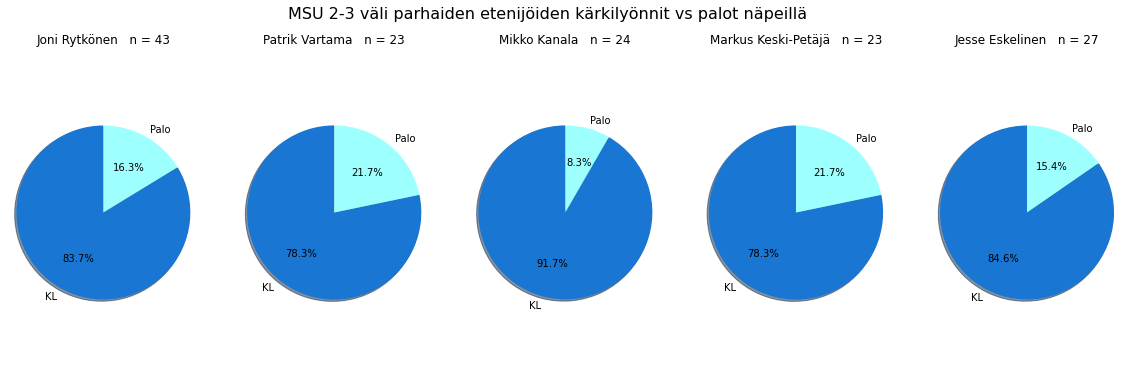

In [160]:
hits = pd.read_csv('../events/events_2021_msu.csv'.format(league), low_memory=False)
hits = hits[hits['tyyppi'] == 'nappi']
hits = hits[
    (hits['tilanne'] == '1-2') |
    (hits['tilanne'] == '0-2')
]

hits = hits[
    (hits['tulos'] == 'Palo') 
    | (hits['tulos'] == 'Kärkilyönti')
    | (hits['tulos'] == 'Haava')
]
fig, axs = plt.subplots(nrows=1, ncols=5, figsize = (20, 6))

for index, karki in enumerate(['Joni Rytkönen', 'Patrik Vartama', 'Mikko Kanala', 'Markus Keski-Petäjä', 'Jesse Eskelinen']):
    ax1 = axs.flatten()[index]
    
    df = hits[hits['karki'] == karki]
    palot = len(df[df['tulos'] == 'Palo'])
    karsyt = len(df[df['tulos'] == 'Kärkilyönti'])
    print('{}: {} - len {}'.format(karki, karsyt / (palot + karsyt), len(df)))
    
    labels = ['KL', 'Palo']
    sizes = [karsyt, palot]
    colors=['#1976D2', '#9EFFFF']

    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90, colors=colors)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.title.set_text('{}   n = {}'.format(karki, len(df)))
    
fig.suptitle('MSU 2-3 väli parhaiden etenijöiden kärkilyönnit vs palot näpeillä', fontsize=16)

fig.savefig('./2-3_msu_parhaiden_etenemiset.png')

Patrik Vartama: 0.8461538461538461 - len 26
Mikko Kanala: 0.9166666666666666 - len 12
Teemu Rouhiainen: 0.6896551724137931 - len 30
Elmeri Purmonen: 0.6944444444444444 - len 38
Timo Torppa: 0.8809523809523809 - len 42


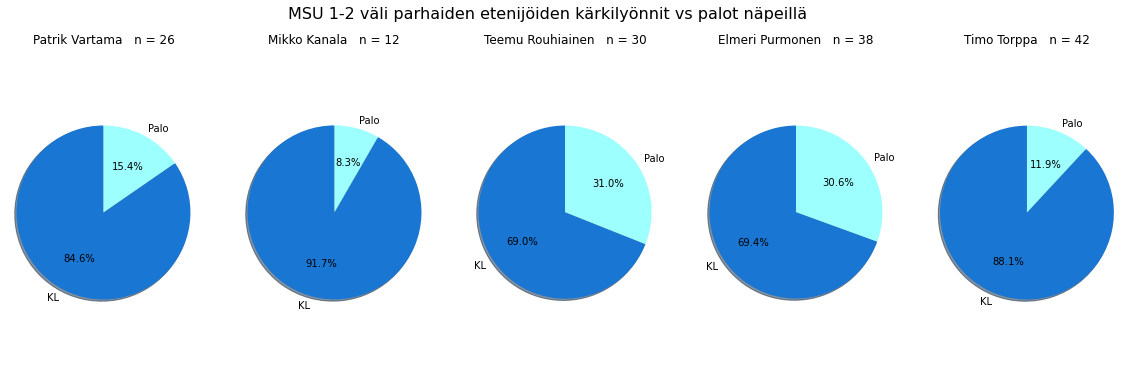

In [161]:
hits = pd.read_csv('../events/events_2021_msu.csv'.format(league), low_memory=False)
hits = hits[hits['tyyppi'] == 'nappi']
hits = hits[
    (hits['tilanne'] == '1')
]

hits = hits[
    (hits['tulos'] == 'Palo') 
    | (hits['tulos'] == 'Kärkilyönti')
    | (hits['tulos'] == 'Haava')
]

fig, axs = plt.subplots(nrows=1, ncols=5, figsize = (20, 6))

for index, karki in enumerate(['Patrik Vartama', 'Mikko Kanala', 'Teemu Rouhiainen', 'Elmeri Purmonen', 'Timo Torppa']):
    ax1 = axs.flatten()[index]
    
    df = hits[hits['karki'] == karki]
    palot = len(df[df['tulos'] == 'Palo'])
    karsyt = len(df[df['tulos'] == 'Kärkilyönti'])
    print('{}: {} - len {}'.format(karki, karsyt / (palot + karsyt), len(df)))
    
    labels = ['KL', 'Palo']
    sizes = [karsyt, palot]
    colors=['#1976D2', '#9EFFFF']

    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90, colors=colors)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.title.set_text('{}   n = {}'.format(karki, len(df)))
    
fig.suptitle('MSU 1-2 väli parhaiden etenijöiden kärkilyönnit vs palot näpeillä', fontsize=16)

fig.savefig('./1-2_msu_parhaiden_etenemiset.png')

Saaga-Angelia Raudasoja: 0.8070175438596491 - len 57
Kaisaleena Rautakorpi: 0.7222222222222222 - len 73
Aino Tanhua: 0.6764705882352942 - len 34
Henna Peltokangas: 0.75 - len 56
Sara-Ella Kemppainen: 0.8571428571428571 - len 14


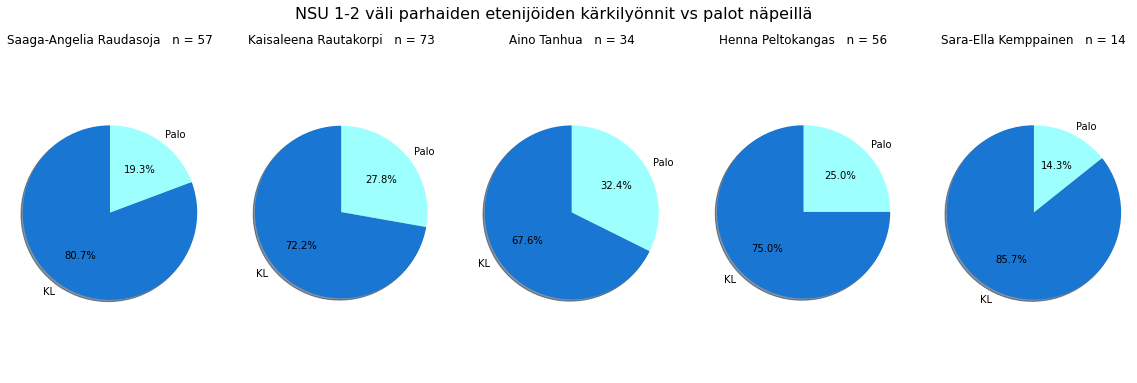

In [164]:
hits = pd.read_csv('../events/events_2021_nsu.csv'.format(league), low_memory=False)
hits = hits[hits['tyyppi'] == 'nappi']
hits = hits[
    (hits['tilanne'] == '1')
]

hits = hits[
    (hits['tulos'] == 'Palo') 
    | (hits['tulos'] == 'Kärkilyönti')
    | (hits['tulos'] == 'Haava')
]

fig, axs = plt.subplots(nrows=1, ncols=5, figsize = (20, 6))

for index, karki in enumerate(['Saaga-Angelia Raudasoja', 'Kaisaleena Rautakorpi', 'Aino Tanhua', 'Henna Peltokangas', 'Sara-Ella Kemppainen']):
    ax1 = axs.flatten()[index]
    
    df = hits[hits['karki'] == karki]
    palot = len(df[df['tulos'] == 'Palo'])
    karsyt = len(df[df['tulos'] == 'Kärkilyönti'])
    print('{}: {} - len {}'.format(karki, karsyt / (palot + karsyt), len(df)))
    
    labels = ['KL', 'Palo']
    sizes = [karsyt, palot]
    colors=['#1976D2', '#9EFFFF']

    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90, colors=colors)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.title.set_text('{}   n = {}'.format(karki, len(df)))
    
fig.suptitle('NSU 1-2 väli parhaiden etenijöiden kärkilyönnit vs palot näpeillä', fontsize=16)

fig.savefig('./1-2_nsu_parhaiden_etenemiset.png')

Emma Körkkö: 1.0 - len 12
Kaisaleena Rautakorpi: 0.7755102040816326 - len 52
Ida Lähde: 0.8695652173913043 - len 23
Kaisa Peräaho: 0.7 - len 20
Kati Tanhua: 0.7878787878787878 - len 33


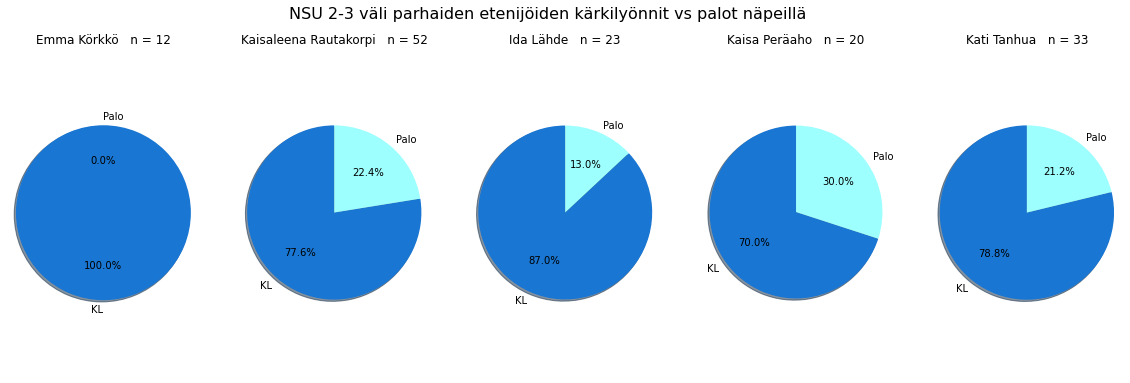

In [163]:
hits = pd.read_csv('../events/events_2021_nsu.csv'.format(league), low_memory=False)
hits = hits[hits['tyyppi'] == 'nappi']
hits = hits[
    (hits['tilanne'] == '1-2') |
    (hits['tilanne'] == '0-2')
]

hits = hits[
    (hits['tulos'] == 'Palo') 
    | (hits['tulos'] == 'Kärkilyönti')
    | (hits['tulos'] == 'Haava')
]

fig, axs = plt.subplots(nrows=1, ncols=5, figsize = (20, 6))

for index, karki in enumerate(['Emma Körkkö', 'Kaisaleena Rautakorpi', 'Ida Lähde', 'Kaisa Peräaho', 'Kati Tanhua']):
    ax1 = axs.flatten()[index]
    
    df = hits[hits['karki'] == karki]
    palot = len(df[df['tulos'] == 'Palo'])
    karsyt = len(df[df['tulos'] == 'Kärkilyönti'])
    print('{}: {} - len {}'.format(karki, karsyt / (palot + karsyt), len(df)))
    
    labels = ['KL', 'Palo']
    sizes = [karsyt, palot]
    colors=['#1976D2', '#9EFFFF']

    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90, colors=colors)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.title.set_text('{}   n = {}'.format(karki, len(df)))
    
fig.suptitle('NSU 2-3 väli parhaiden etenijöiden kärkilyönnit vs palot näpeillä', fontsize=16)

fig.savefig('./2-3_nsu_parhaiden_etenemiset.png')

### Patrik Vartama 2-3 väli näpeillä 79% ehti loput paloi

In [249]:
hits = pd.read_csv('../events/events_2021_nsu.csv'.format(league), low_memory=False)
hits = hits[hits['tyyppi'] == 'nappi']
hits = hits[
    (hits['tilanne'] == '1-2')
    | (hits['tilanne'] == '0-2')
]

hits = hits[
    (hits['tulos'] == 'Palo') 
    | (hits['tulos'] == 'Kärkilyönti')
    | (hits['tulos'] == 'Haava')
]

for karki in ['Emma Körkkö', 'Kaisaleena Rautakorpi', 'Ida Lähde', 'Kaisa Peräaho', 'Kati Tanhua']:
    df = hits[hits['karki'] == karki]
    palot = len(df[df['tulos'] == 'Palo'])
    karsyt = len(df[df['tulos'] == 'Kärkilyönti'])
    print('{}: {} - len {}'.format(karki, karsyt / (palot + karsyt), len(df)))

Emma Körkkö: 1.0 - len 12
Kaisaleena Rautakorpi: 0.7755102040816326 - len 52
Ida Lähde: 0.8695652173913043 - len 23
Kaisa Peräaho: 0.7 - len 20
Kati Tanhua: 0.7878787878787878 - len 33


### Mikko Kanala 2-3 väli näpeillä 88% ehti loput paloi

NSU

In [250]:
hits = pd.read_csv('../events/events_2021_nsu.csv'.format(league), low_memory=False)
hits = hits[hits['tyyppi'] == 'nappi']
hits = hits[
    hits['tilanne'] == '1'
]

hits = hits[
    (hits['tulos'] == 'Palo') 
    | (hits['tulos'] == 'Kärkilyönti')
    | (hits['tulos'] == 'Haava')
]

for karki in ['Emma Körkkö', 'Kaisaleena Rautakorpi', 'Ida Lähde', 'Kaisa Peräaho', 'Kati Tanhua']:
    df = hits[hits['karki'] == karki]
    palot = len(df[df['tulos'] == 'Palo'])
    karsyt = len(df[df['tulos'] == 'Kärkilyönti'])
    print('{}: {} - len {}'.format(karki, karsyt / (palot + karsyt), len(df)))

Emma Körkkö: 0.6 - len 5
Kaisaleena Rautakorpi: 0.7222222222222222 - len 73
Ida Lähde: 0.7 - len 20
Kaisa Peräaho: 0.5454545454545454 - len 11
Kati Tanhua: 0.8157894736842105 - len 39


In [146]:
runs = pd.read_csv('./runs_nsu_2021.csv'.format(league), low_memory=False)
hits = pd.read_csv('../events/events_2021_nsu.csv'.format(league), low_memory=False)

run_hits = runs.join(hits.set_index('eventId'), how='left', on='eventId', lsuffix="asd_",  rsuffix="ddd_")
run_hits = run_hits[run_hits['runner'] == 'Kaisaleena Rautakorpi'] 
print(len(run_hits))

run_hits = run_hits[run_hits['tyyppi'] == 'nappi']
run_hits = run_hits[run_hits['base'] == base]
run_hits = run_hits[run_hits['vapaa'] == False]
run_hits = run_hits[run_hits['merkattuLaiton'] == False]

kerkes = len(run_hits[run_hits['tulos'] == 'Kärkilyönti'])
palo = len(run_hits[run_hits['tulos'] == 'Palo'])
print(kerkes / (palo + kerkes))
print(kerkes)
print(palo)

121
0.5789473684210527
22
16


In [147]:
runs = pd.read_csv('./runs_nsu_2021.csv'.format(league), low_memory=False)
hits = pd.read_csv('../events/events_2021_nsu.csv'.format(league), low_memory=False)

run_hits = runs.join(hits.set_index('eventId'), how='left', on='eventId', lsuffix="asd_",  rsuffix="ddd_")
run_hits = run_hits[run_hits['runner'] == 'Ida Lähde'] 

run_hits = run_hits[run_hits['tyyppi'] == 'nappi']
run_hits = run_hits[run_hits['base'] == base]
run_hits = run_hits[run_hits['vapaa'] == False]
run_hits = run_hits[run_hits['merkattuLaiton'] == False]

kerkes = len(run_hits[run_hits['tulos'] == 'Kärkilyönti'])
palo = len(run_hits[run_hits['tulos'] == 'Palo'])
print(kerkes / (palo + kerkes))
print(kerkes)
print(palo)

0.6666666666666666
8
4
